## Enfermedades Coralinas

Rodrigo Fritz

| Tamaño promedio de los nódulos (en área superficial proyectada) || Tamaño promedio de los lunares obscuros (en área superficial proyectada) |
| :-: || :-: |
| 66.5 ± 107 cm$^2$ || 6 ± 5.4 cm$^2$ |

| Tamaño promedio de la colonia (en área superficial proyectada) || Número promedio de nódulos por colonia |
| :-: || :-: |
| 500$\pi$ = 1,570.8 cm$^2$ en un óvalo de 40cm $\times$ 50cm || 23.62 |

$ $

| Tasa de crecimiento del coral | Tasa de avance lineal de lunares obscuros | Incidencia | Promedio de lunares obscuros por nódulo enfermo | Recuperación |
| :-: | :-: | :-: | :-: | :-: |
| 0.86 ± 0.04 cm/año | 1.77 ± 1.8 cm/año | 37.8% anual | 3.08 ± 4 lunares/nódulo | 6.5% promedio |

Si consideramos que en 5 años el coral crece 4.3 cm en una dirección, esos son 18.5 cm$^2$, i.e 3.7 cm$^2$ al año

Queremos 1,570 agentes en la malla

Tasa de crecimiento de *O. annularis* y *O. faveolata* de entre 0.2 y 1.1 cm/año (Hubbard and Scaturo,1985; Runnalls and Coleman, 2003)

Su longevidad se estima mayor a 10 años (Aronson et al. 2008)

Colonias de tamaño mayor a 200 cm$^2$ son totalmente reproductivas

Over a quarter-century, colonies > 50 cm2 became rare, the abundance of colonies ≤ 50 cm2 increased from 58% (1988) to 92% (2013), and population density doubled to 67 colonies m$^{-2}$ by 2013

67 colonias por metro cuadrado corresponden a 100cm x 100cm = 10,000cm$^2$, entonces 10,000cm$^2$/67 colonias $\approx$ 149.25 cm$^2$/colonia, lo que quiere decir que 1 colonia es de unos 150 cm$^2$, y antes de 1988 solían ser de 350 cm$^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

# For the progress bar:
import time
from tqdm.notebook import tqdm

La simulación con autómatas celulares, i.e. el modelo basado en agentes, genera una imagen para cada paso de la evolución, cada una de las cuales será guardada en un .gif

Hay 4 estados para cada pixel de la malla cuadrada que represanta a un agente:

- Estado 0 (azul):     espacio vacío
- Estado 1 (verde):    coral en crecimiento
- Estado 2 (amarillo): lunar oscuro creciendo sobre el coral
- Estado 3 (rojo):     muerte del coral debida al lunar

La siguiente función implementa una restricción para que un estado no pueda cambiar a otros 2 estados a elegir (esos 2 pueden ser el mismo) y toma las 8 celdas en la vecindad de Moore, las 4 celdas en la vecindad de von Neumann en la siguiente capa, y la celda en cuestión

In [2]:
#Para cambiar cuadros de 13 celdas en un mismo estado, a otro estado
def restriction(df,i,side,s1,s2,s3):
    if all([
        df.iloc[i-1]["state"] != s2 and df.iloc[i-1]["state"] != s3, #Si las celdas vecinas están en estados distintos a s2 o s3
        df.iloc[i  ]["state"] != s2 and df.iloc[i  ]["state"] != s3,
        df.iloc[i+1]["state"] != s2 and df.iloc[i+1]["state"] != s3,
        df.iloc[i-side-1]["state"] != s2 and df.iloc[i-1]["state"] != s3,
        df.iloc[i-side  ]["state"] != s2 and df.iloc[i-side  ]["state"] != s3,
        df.iloc[i-side+1]["state"] != s2 and df.iloc[i-side+1]["state"] != s3,
        df.iloc[i+side-1]["state"] != s2 and df.iloc[i+side-1]["state"] != s3,
        df.iloc[i+side  ]["state"] != s2 and df.iloc[i+side  ]["state"] != s3,
        df.iloc[i+side+1]["state"] != s2 and df.iloc[i+side+1]["state"] != s3,
        #"ovalado"
        df.iloc[i-2*side]["state"] != s2 and df.iloc[i-2*side]["state"] != s3,
        df.iloc[i+2*side]["state"] != s2 and df.iloc[i+2*side]["state"] != s3,
        df.iloc[i-2]["state"] != s2 and df.iloc[i-2]["state"] != s3,
        df.iloc[i+2]["state"] != s2 and df.iloc[i+2]["state"] != s3
        ]):
            df.iloc[i-1]["state"] = s1        #se convierten al estado s1
            df.iloc[i  ]["state"] = s1
            df.iloc[i+1]["state"] = s1
            df.iloc[i-side-1]["state"] = s1
            df.iloc[i-side  ]["state"] = s1
            df.iloc[i-side+1]["state"] = s1
            df.iloc[i+side-1]["state"] = s1
            df.iloc[i+side  ]["state"] = s1
            df.iloc[i+side+1]["state"] = s1
            #"ovalado"
            df.iloc[i-2*side]["state"] = s1
            df.iloc[i+2*side]["state"] = s1
            df.iloc[i-2]["state"] = s1
            df.iloc[i+2]["state"] = s1

Funciones para el crecimiento del coral

In [3]:
#Llamando a la función restriction para la vecindad tipo Moore
def coral(df, side, β=0.1): # df = data frame, β = tasa de crecimiento
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<β): #Las semillas de corales (estado 1)
            restriction(df,i,side,1,3,3)

Funciones para el avance del lunar

In [4]:
#lunar a partir de lunar
def lunar(df, side, σ=0.1): #df = data frame, σ = tasa de avance lineal de los lunares obscuros
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==2 and p<σ): #Las semillas de corales (estado 1)
            restriction(df,i,side,2,3,0)

Funciones para la aparición de células muertas

In [5]:
#Muertos en vecindades
def muertos(df, γ=0.1): #γ = tasa de mortalidad
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==2 and p<γ): #Los infectados se transforman en recuperados después de 1/gamma días
            restriction(df,i,side,3,0,1)

Importamos librerías para las imágenes y definimos el folder para guardarlas

In [6]:
from PIL import Image
import matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay

In [7]:
save_folder = 'coral1'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

Hay un cambio de escala a partir de una malla de 75x75

### Celda de 51x51

In [15]:
β = 0.005 #tasa de crecimiento
σ = 0.02  #tasa de infección (σ=β batalla infinita)
γ = 0.001 #tasa de mortalidad
Tmax = 506 #tiempo final (sumar 1 para terminar en número redondo)
side = 51 #lado del cuadrado (sumar 1 para terminar en número redondo)
nAgents = side**2 #el número de agentes es el número de pixeles, que es el lado del cuadrado al cuadrado
state = np.zeros(nAgents, dtype=int)
data = {"state": state}
agents = pd.DataFrame(data)

#Iniciar n corales en pixeles aleatorios
n = 10
arr = []
for i in range(n):
    i0 = np.random.randint(0,nAgents)
    s0 = 1
    agents.iloc[i0]["state"] = s0
    arr.append(i0)

S = [len(agents[agents["state"]==0])]
E = [len(agents[agents["state"]==1])]
I = [0]
R = [0]
print('Hay', nAgents, 'agentes (pixeles),')
print('empezamos con', E[0], 'corales')
# print('en las posiciones', arr)
print('por lo que quedan', S[0], 'espacios vacíos')

#Código de color
cmap = colors.ListedColormap(['blue','green','orange','red']) #Para tener el mismo código de color que el default de pyplot
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

tiempo = time.time() # To start recording time of operation

for t in tqdm(range(1,Tmax)): #tqdm is the progress bar
    lunar(agents, side, σ)
    muertos(agents, γ)
    if t <= 5:
        coral(agents, side, 0.28) #crecimiento rápido (β=0.2 para side=51) para iniciar con coral crecido
    else:
        coral(agents, side, β) #crecimiento con tasa β

    #Iniciar n lunares en pixeles aleatorios
    if t==5:
        c1 = agents[agents["state"]==1].size #número de agentes en estado "coral"
        m = int(c1/50) #infectar el 2% de los corales
        for i in range(m):
            i0 = np.random.randint(0,nAgents)
            if agents.iloc[i0]["state"] == 1:
                agents.iloc[i0-side]["state"] = 2
                agents.iloc[i0-1]["state"] = 2
                agents.iloc[i0]["state"] = 2
                agents.iloc[i0+1]["state"] = 2
                agents.iloc[i0+side]["state"] = 2
        l1 = agents[agents["state"]==2].size #número de agentes en estado "lunar"
        
    sts = np.array(agents["state"])
    show_sts = np.reshape( sts, (side,side) )
    img = plt.imshow(show_sts, cmap=cmap, norm=norm)
    plt.colorbar(boundaries=bounds, ticks=[0,1,2,3])
    plt.title("t = "+str(t))
    plt.xticks(np.arange(0, side+1, 10))
    plt.yticks(np.arange(0, side+1, 10))
#     plt.show() #Para ver aquí abajo las imágenes
    name = "./coral1/img"+str(t).zfill(3)+".png"
    plt.savefig(name)
    plt.clf()
    S.append(len(agents[agents["state"]==0]))
    E.append(len(agents[agents["state"]==1]))
    I.append(len(agents[agents["state"]==2]))
    R.append(len(agents[agents["state"]==3]))

c2 = agents[agents["state"]==1].size
print(β,σ,γ)
print('Corales iniciales/finales',c1,c2)
print('Lunares iniciales/finales',l1,agents[agents["state"]==2].size)
print('Muertos',agents[agents["state"]==3].size)
# print('Diferencia',c2-c1)
# print('Tasa de coral',(c2-c1)/(Tmax-5))
print("Operation took %g seconds" % (time.time() - tiempo))

Hay 2601 agentes (pixeles),
empezamos con 10 corales
por lo que quedan 2591 espacios vacíos


  0%|          | 0/505 [00:00<?, ?it/s]

0.005 0.02 0.001
Corales iniciales/finales 2266 275
Lunares iniciales/finales 207 196
Muertos 2060
Operation took 1448 seconds


<Figure size 432x288 with 0 Axes>

### Ahora graficando cada 20 iteraciones

Hay 2601 agentes (pixeles),
empezamos con 10 corales
por lo que quedan 2591 espacios vacíos


  0%|          | 0/505 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

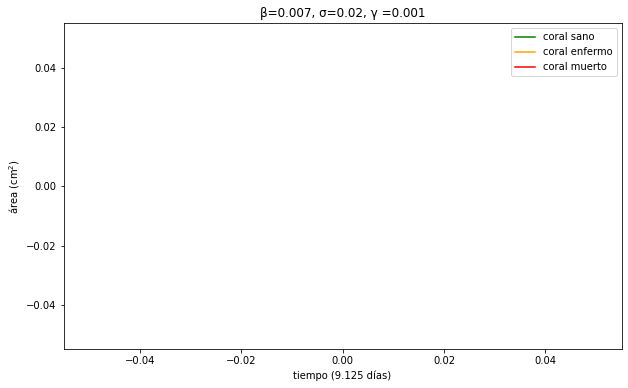

<Figure size 432x288 with 0 Axes>

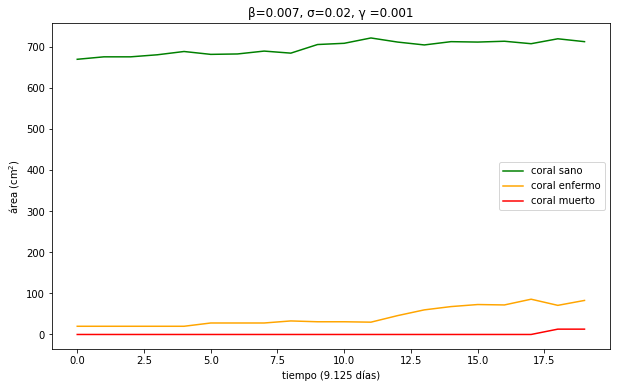

<Figure size 432x288 with 0 Axes>

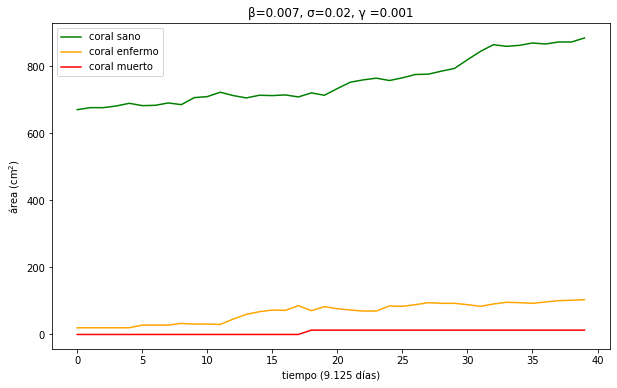

<Figure size 432x288 with 0 Axes>

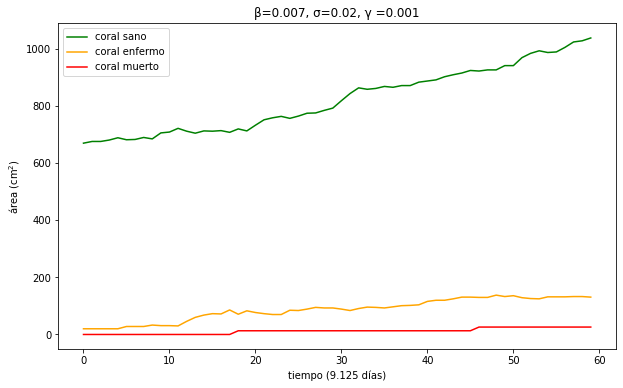

<Figure size 432x288 with 0 Axes>

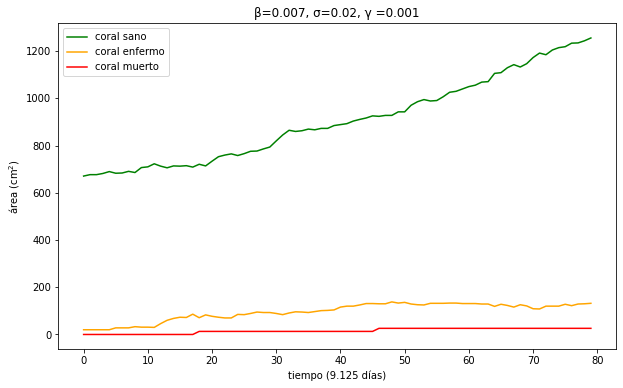

<Figure size 432x288 with 0 Axes>

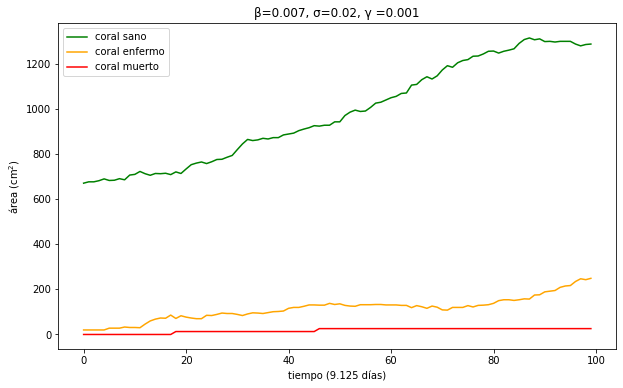

<Figure size 432x288 with 0 Axes>

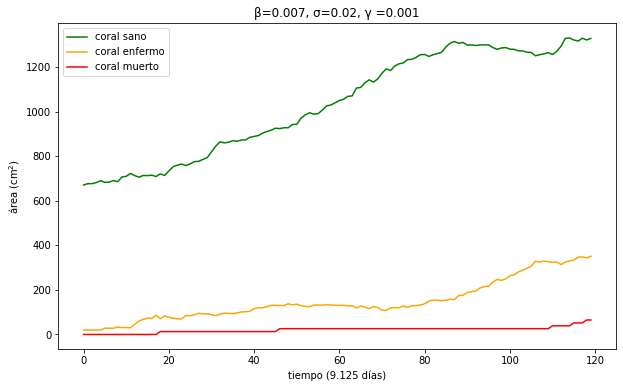

<Figure size 432x288 with 0 Axes>

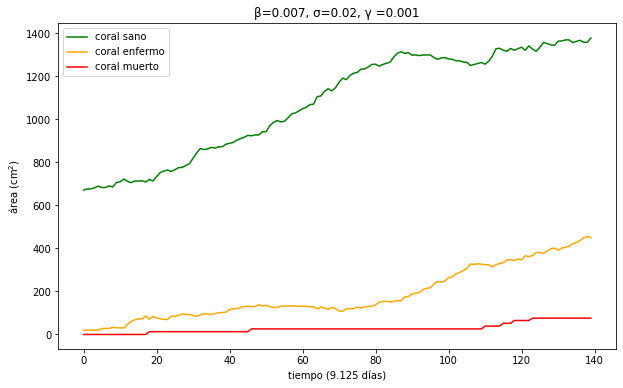

<Figure size 432x288 with 0 Axes>

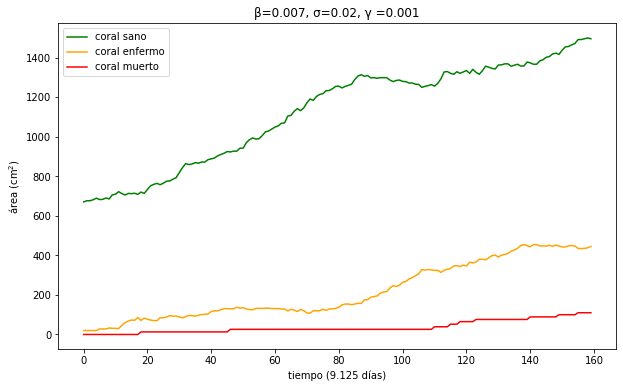

<Figure size 432x288 with 0 Axes>

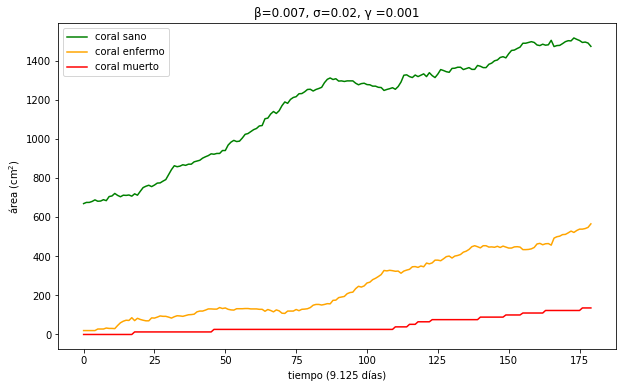

<Figure size 432x288 with 0 Axes>

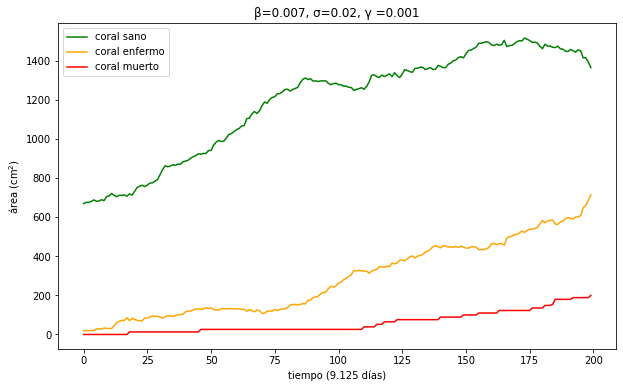

<Figure size 432x288 with 0 Axes>

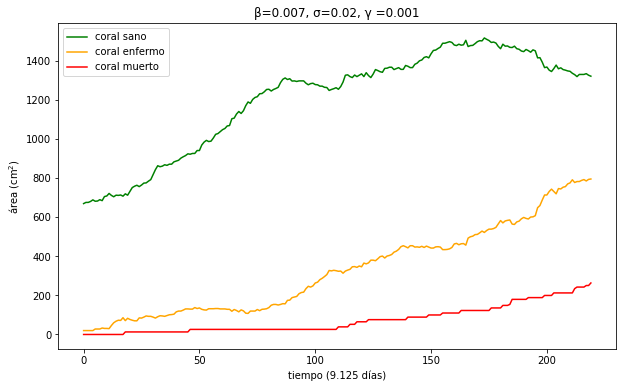

<Figure size 432x288 with 0 Axes>

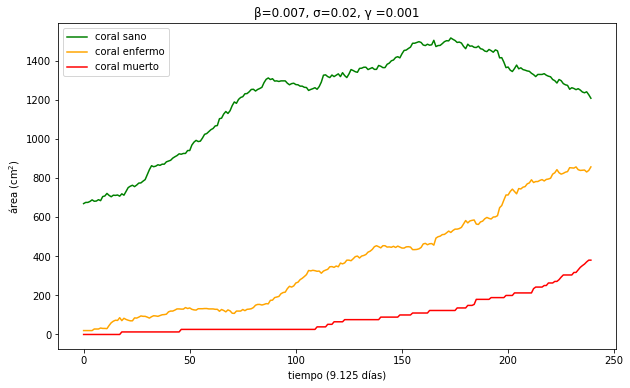

<Figure size 432x288 with 0 Axes>

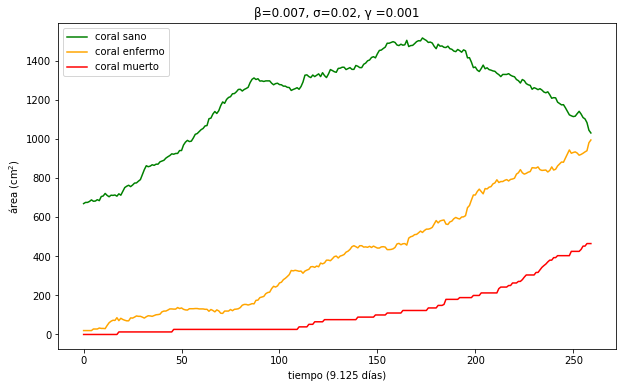

<Figure size 432x288 with 0 Axes>

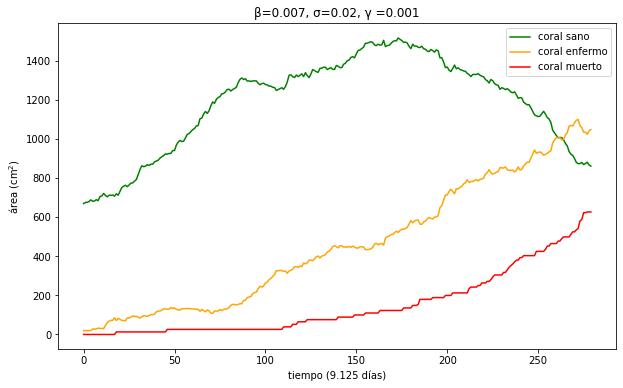

<Figure size 432x288 with 0 Axes>

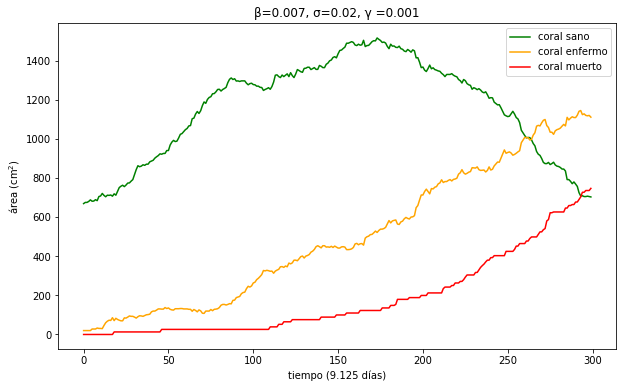

<Figure size 432x288 with 0 Axes>

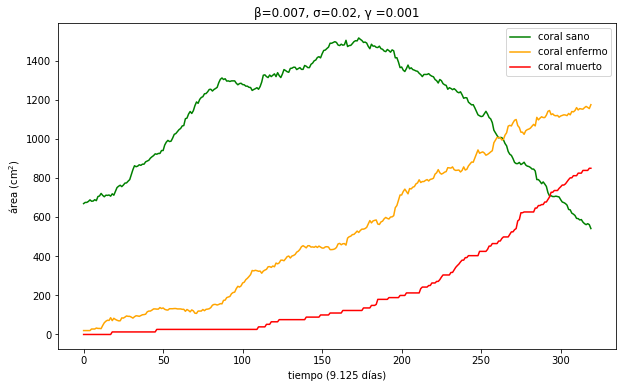

<Figure size 432x288 with 0 Axes>

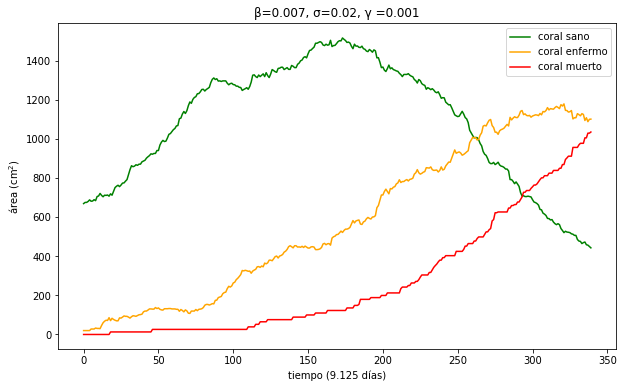

<Figure size 432x288 with 0 Axes>

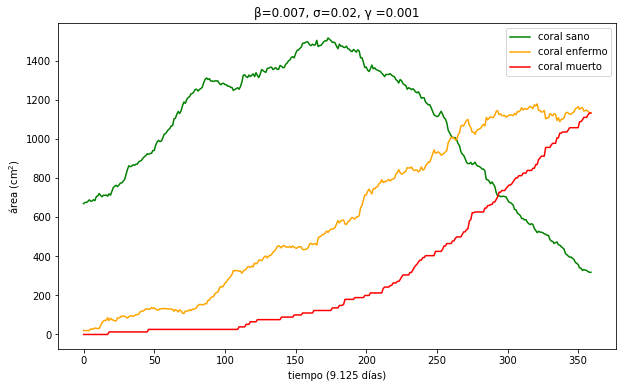

<Figure size 432x288 with 0 Axes>

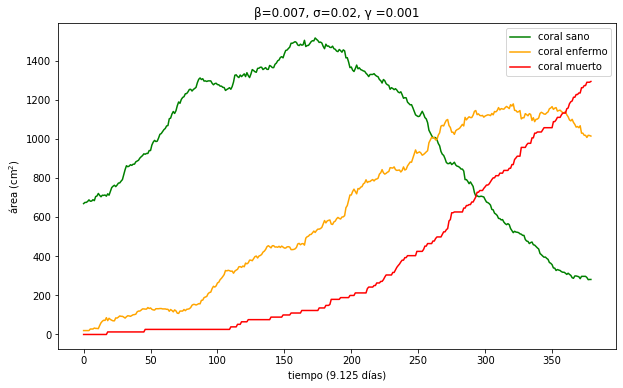

<Figure size 432x288 with 0 Axes>

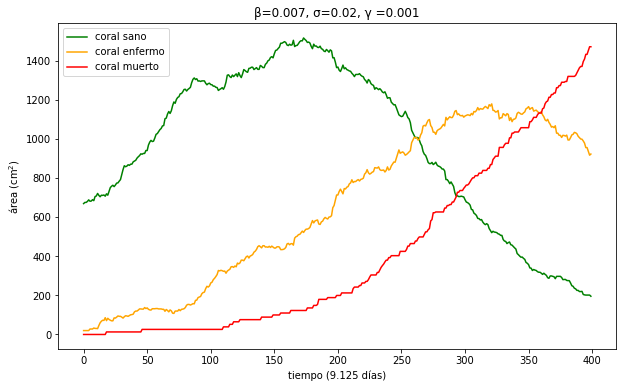

<Figure size 432x288 with 0 Axes>

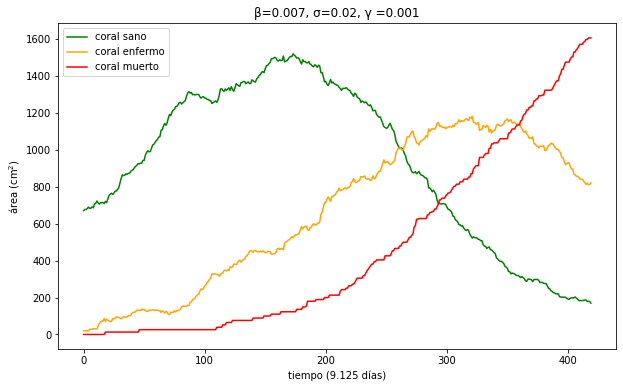

<Figure size 432x288 with 0 Axes>

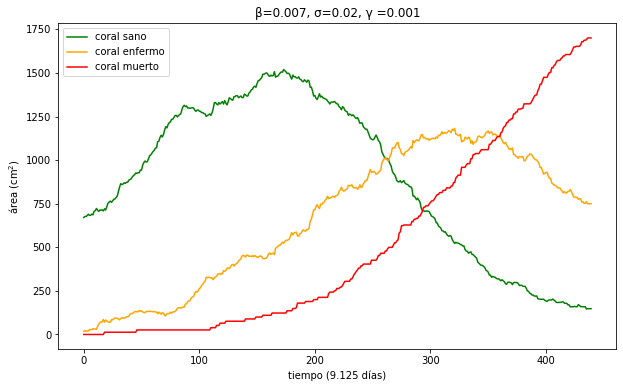

<Figure size 432x288 with 0 Axes>

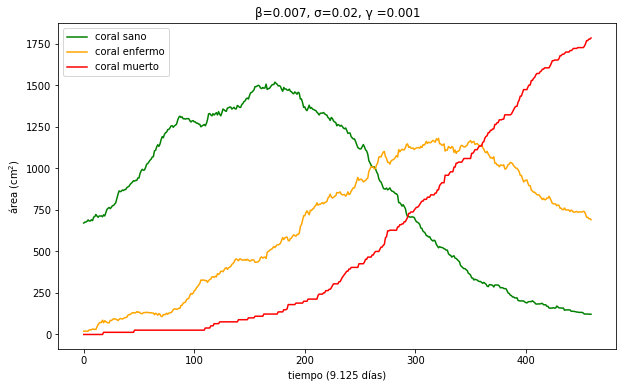

<Figure size 432x288 with 0 Axes>

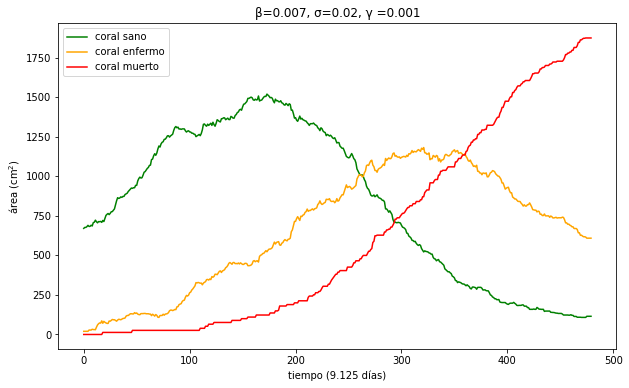

<Figure size 432x288 with 0 Axes>

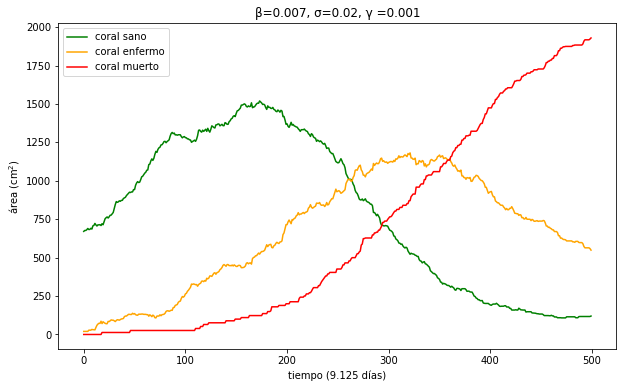

0.007 0.02 0.001
Corales iniciales/finales 689 120
Lunares iniciales/finales 20 549
Muertos 1930
Operation took 1039.85 seconds


<Figure size 432x288 with 0 Axes>

In [33]:
β = 0.007 #tasa de crecimiento 0.005
σ = 0.02  #tasa de infección (σ=β batalla infinita) 0.02
γ = 0.001 #tasa de mortalidad 0.001
Tmax = 506 #tiempo final (sumar 1 para terminar en número redondo)
side = 51 #lado del cuadrado (sumar 1 para terminar en número redondo)
nAgents = side**2 #el número de agentes es el número de pixeles, que es el lado del cuadrado al cuadrado
state = np.zeros(nAgents, dtype=int)
data = {"state": state}
agents = pd.DataFrame(data)

#Iniciar n corales en pixeles aleatorios
n = 10
arr = []
for i in range(n):
    i0 = np.random.randint(0,nAgents)
    s0 = 1
    agents.iloc[i0]["state"] = s0
    arr.append(i0)

S = [len(agents[agents["state"]==0])]
E = [len(agents[agents["state"]==1])]
I = [0]
R = [0]
print('Hay', nAgents, 'agentes (pixeles),')
print('empezamos con', E[0], 'corales')
# print('en las posiciones', arr)
print('por lo que quedan', S[0], 'espacios vacíos')

#Código de color
cmap = colors.ListedColormap(['blue','green','orange','red']) #Para tener el mismo código de color que el default de pyplot
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

tiempo = time.time() # To start recording time of operation

for t in tqdm(range(1,Tmax)): #tqdm is the progress bar
    lunar(agents, side, σ)
    muertos(agents, γ)
    if t < 5:
        coral(agents, side, 0.22) #crecimiento rápido (β=0.2) para iniciar con coral crecido
    else:
        coral(agents, side, β) #crecimiento con tasa β
    #Iniciar n lunares en pixeles aleatorios
    if t==5:
        c1 = agents[agents["state"]==1].size #número de agentes en estado "coral"
        m = int(c1/50) #infectar el 2% de los corales
        for i in range(m):
            i0 = np.random.randint(0,nAgents)
            if agents.iloc[i0]["state"] == 1:
                agents.iloc[i0-side]["state"] = 2
                agents.iloc[i0-1]["state"] = 2
                agents.iloc[i0]["state"] = 2
                agents.iloc[i0+1]["state"] = 2
                agents.iloc[i0+side]["state"] = 2
        l1 = agents[agents["state"]==2].size #número de agentes en estado "lunar"
    if t % 20 == 5:
        plt.figure(figsize=(10,6))
        plt.title('β=' + str(β) + ', σ=' + str(σ) + ', γ ={}'.format(γ))
#         plt.plot(S[5:], 'b', label="espacio vacío")
        plt.plot(E[5:], 'g', label="coral sano")
        plt.plot(I[5:], 'orange', label="coral enfermo")
        plt.plot(R[5:], 'r', label="coral muerto")
        plt.ylabel('área (cm$^2$)')
        plt.xlabel('tiempo (9.125 días)')
        plt.legend()
        plt.show()
        
    sts = np.array(agents["state"])
    show_sts = np.reshape( sts, (side,side) )
    img = plt.imshow(show_sts, cmap=cmap, norm=norm)
    plt.colorbar(boundaries=bounds, ticks=[0,1,2,3])
    plt.title("t = "+str(t))
    plt.xticks(np.arange(0, side+1, 10))
    plt.yticks(np.arange(0, side+1, 10))
#     plt.show() #Para ver aquí abajo las imágenes
    name = "./coral1/img"+str(t).zfill(3)+".png"
    plt.savefig(name)
    plt.clf()
    S.append(len(agents[agents["state"]==0]))
    E.append(len(agents[agents["state"]==1]))
    I.append(len(agents[agents["state"]==2]))
    R.append(len(agents[agents["state"]==3]))

c2 = agents[agents["state"]==1].size
print(β,σ,γ)
print('Corales iniciales/finales',c1,c2)
print('Lunares iniciales/finales',l1,agents[agents["state"]==2].size)
print('Muertos',agents[agents["state"]==3].size)
# print('Diferencia',c2-c1)
# print('Tasa de coral',(c2-c1)/(Tmax-5))
print("Operation took %g seconds" % (time.time() - tiempo))

In [ ]:
cf500 = np.array([594,78,51,674,225,791])

In [ ]:
ci500 = np.array([926,1315,2364,1038,863,804])

In [ ]:
tasa_c = (cf500 - ci500)/500
print(tasa_c)
print(np.mean(tasa_c))

In [ ]:
np.mean(cf500)

In [ ]:
np.mean(ci500)

Corales en 200 años

Todas con γ=0.001, primeras 3 con σ=0.01, β=0.005, segundas 3 con σ=0.02, β=0.005, terceras 3 con β=0.004, la décima con, β=0.005 de nuevo, la onceava con β=0.01, σ=0.02, γ=0.01, doceava de nuevo β=0.005, σ=0.02, γ=0.001

In [ ]:
c0200 = np.array([729,1674,1144,1654,1890,1578,1093,413,304,876,1111,926])

In [ ]:
len(c0200)

In [ ]:
c200 = np.array([1521,2231,2016,398,278,443,955,1339,1077,1433,2028,594])

In [ ]:
(c200 - c0200)/200

In [ ]:
np.mean(c0200)

Se observa que con σ=0.01 la tasa de crecimiento del coral es positiva, con σ=0.02 la tasa es negativa, con β=0.004 vuelve a ser positiva pues el crecimiento del coral fue tan poco que no dio espacio suficiente para la enfermedad.

Lunares en 200 años, σ=0.01

In [ ]:
l0200 = np.array([39,20,50])

In [ ]:
l200 = np.array([231,134,155])

In [ ]:
(l200 - l0200)/100

Lunares en 200 años, σ=0.02

In [ ]:
l0200 = np.array([110,132,80,25,25,55,35,25,25])

In [ ]:
l200 = np.array([916,1131,1055,309,755,530,716,429,323])

In [ ]:
(l200 - l0200)/200

In [ ]:
np.mean((l200 - l0200)/200)

In [ ]:
m200 = np.array([76,61,78,987,1052,1000,495,1918,1120,1908,1393])

In [ ]:
mye = m200 + np.array([231,134,155,916,1131,1055,755,530,716,429,323])
mye

In [ ]:
#Proporción de muertos en el total de muertos + enfermos
m200/mye

In [ ]:
print(E[5],E[125])
(E[125]-E[5])/120

In [ ]:
print(E[5],E[125])
(E[125]-E[5])/120

In [ ]:
print(E[5],E[125])
(E[125]-E[5])/120

Lunares en 200 años pero con β=0.004

In [ ]:
l0200 = np.array([30,5])

In [ ]:
l200 = np.array([463,18])

In [ ]:
(l200 - l0200)/200

In [ ]:
np.mean((l200 - l0200)/200)

In [ ]:
m200 = np.array([637,13])

In [ ]:
#Proporción de muertos en el total de muertos + enfermos
m200/(m200 + np.array([463,18]))

In [ ]:
agents[agents['state']==0].size

In [ ]:
agents[agents['state']==1].size

In [ ]:
agents[agents['state']==2].size

In [ ]:
agents[agents['state']==3].size

In [ ]:
c1

In [ ]:
l1

# Datos

Con una malla de 51 agentes por lado y 100 unidades de tiempo:

El crecimiento del coral con β = 0.005 **sin enfermedad** es de aprox. 6.5 corales (cm$^2$) por unidad de tiempo

Si consideramos que la tasa de crecimiento del coral (con enfermedad) es de 0.86 cm/año, en 5 años el coral crece 4.3 cm en una dirección, esos son 18.5 cm$^2$, i.e 3.7 cm$^2$ al año

Así que podríamos considerar que el coral crece 6.5 cm$^2$ al año sin enfermedad, con lo que nuestra unidad de tiempo sería 1 año

El avance lineal de los lunares obscuros es de 1.77 cm/año, que son 3.13 cm$^2$/año. Si tenemos un aumento de 4.5 cm$^2$ de lunar por unidad de tiempo, podemos considerar, por simplicidad, que la unidad de tiempo es 1 año (aunque el ajuste sería en realidad 1.5 años) y el avance lineal del lunar es de alrededor de 2 cm/año

In [ ]:
c100 = np.array([219,-634,-60,-1505,655,533,409,284,-272,107,-164,196,-1127])

In [ ]:
c/96

In [ ]:
np.mean(c/96)

In [ ]:
#Corales iniciales
c0= [1338,1142,1674]

### Animation
(from Animated Lorenz Attractor)

In [35]:
# create a tuple of display durations, one for each frame
first_last = 50 #show the first and last frames for 200 ms
standard_duration = 50 #show all other frames for 100 ms
durations = tuple([first_last] + [standard_duration]*(Tmax - 2) + [first_last])

In [36]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))[:Tmax]] #Lee todos los archivos en el folder
gif_filepath = 'coral1/coral.gif'

In [37]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [20]:
IPdisplay.Image(url=gif_filepath)

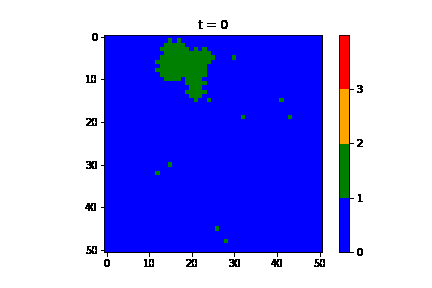

In [71]:
from IPython.display import Image
Image(filename='coral/beta=sigma.gif') 
#Cuando β=σ se equilibra el coral con la enfermedad

Código de color: azul = espacio vacío, verde = coral, amarillo = lunar, rojo = muerto

In [258]:
agents.describe() #Al final de la simulación casi todos están en el estado 3: muertos

,state
count,2601.000000
mean,1.379854
std,1.094866
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


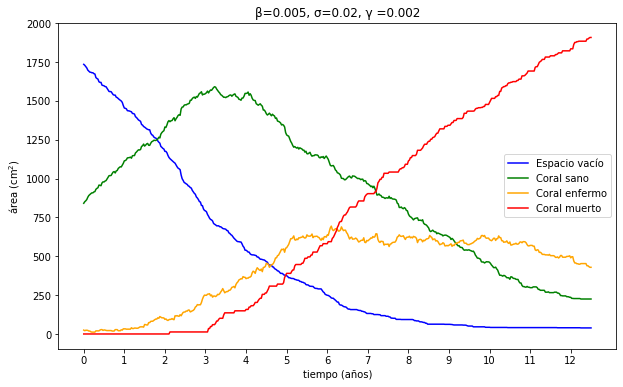

In [50]:
plt.figure(figsize=(10,6))
plt.title('β=' + str(β) + ', σ=' + str(σ) + ', γ ={}'.format(γ))
plt.plot(S[5:], 'b', label="Espacio vacío")
plt.plot(E[5:], 'g', label="Coral sano")
plt.plot(I[5:], 'orange', label="Coral enfermo")
plt.plot(R[5:], 'r', label="Coral muerto")
plt.ylabel('área (cm$^2$)')
plt.xlabel('tiempo (años)') #9.125 días
plt.xticks( range(0,Tmax,40), range(int(Tmax/40)+1) )
plt.legend()
plt.show()

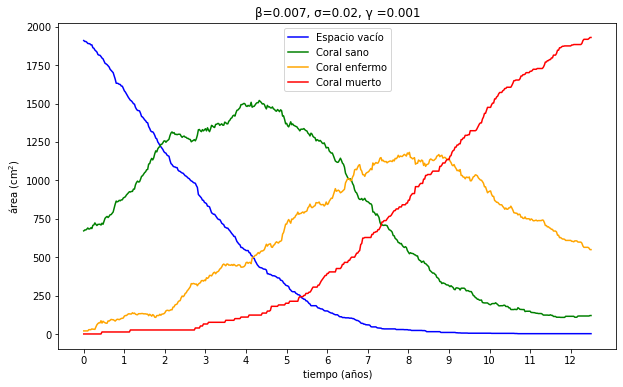

In [34]:
plt.figure(figsize=(10,6))
plt.title('β=' + str(β) + ', σ=' + str(σ) + ', γ ={}'.format(γ))
plt.plot(S[5:], 'b', label="Espacio vacío")
plt.plot(E[5:], 'g', label="Coral sano")
plt.plot(I[5:], 'orange', label="Coral enfermo")
plt.plot(R[5:], 'r', label="Coral muerto")
plt.ylabel('área (cm$^2$)')
plt.xlabel('tiempo (años)') #9.125 días
plt.xticks( range(0,Tmax,40), range(int(Tmax/40)+1) )
plt.legend()
plt.show()